In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft , ifft, fftshift
from scipy.signal.windows import hann, flattop

In [7]:
f1 = 300 #Hz
f2 = 300.25 #Hz
fs = 400 #Hz
N = 2000
k = np.arange(N)
x1 = np.sin (2*np.pi*f1/fs*k)
x2 = np.sin (2*np.pi*f2/fs*k)

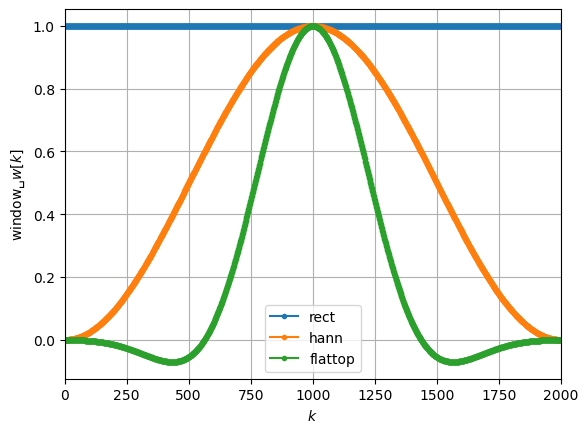

In [8]:
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)
plt.plot(wrect, 'C0o-', ms=3, label='rect')
plt.plot(whann, 'C1o-', ms=3, label='hann')
plt.plot(wflattop, 'C2o-', ms=3, label='flattop')
plt.xlabel(r'$k$')
plt.ylabel(r'window␣$w[k]$')
plt.xlim(0, N)
plt.legend()
plt.grid(True)

In [9]:
X1wrect = fft(x1)
X2wrect = fft(x2)
X1whann = fft(x1*whann)
X2whann = fft(x2*whann)
X1wflattop = fft(x1*wflattop)
X2wflattop = fft (x2*wflattop)

In [10]:
# this handling is working for N even and odd :
def fft2db(X ) :
    N = X.size
    Xtmp = 2/N*X #independent of N, norm for sine amplitudes
    Xtmp[0] *= 1/2 #bin for f=0 Hz is existing only once,
    #so cancel ∗2 from above
    if N%2 == 0 : #fs/2 is included as a bin
        #fs/2 bin is existing only once , so cancel ∗2 from above
        Xtmp[N//2] = Xtmp[N//2]/2
    return 20*np.log10 (np.abs(Xtmp)) #in dB
#setup of frequency vector this way is independent of N even/odd :
df = fs/N
f = np.arange (N)*df

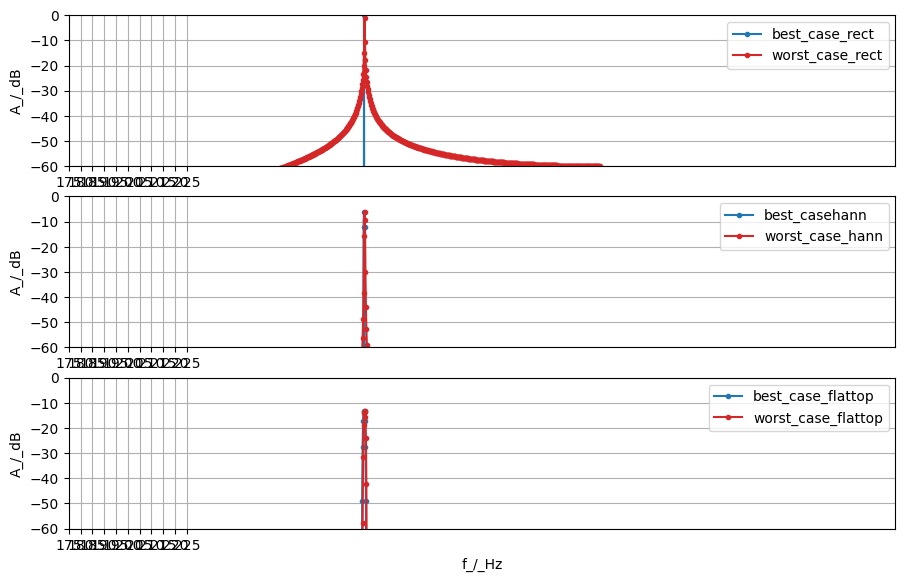

In [11]:
plt.figure(figsize = (16/1.5, 10/1.5))
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1wrect), 'C0o-', ms=3, label='best_case_rect')
plt.plot(f, fft2db(X2wrect), 'C3o-', ms=3, label='worst_case_rect')
plt.xlim (475, 525)
plt.ylim (-60, 0)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
           
#plt.xlabel('f/Hz')
plt.ylabel('A_/_dB')
plt.grid(True)
plt.subplot(3,1,2)
plt.plot(f, fft2db(X1whann), 'C0o-', ms=3,label='best_casehann')
plt.plot(f, fft2db(X2whann), 'C3o-', ms=3, label='worst_case_hann')
plt.xlim(475, 525)
plt.ylim(-60, 0)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
            
#plt.xlabel('f/Hz')
plt.ylabel('A_/_dB')
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1wflattop), 'C0o-', ms=3, label='best_case_flattop')
plt.plot(f, fft2db(X2wflattop), 'C3o-', ms=3, label='worst_case_flattop')
plt.xlim(475, 525)
plt.ylim(-60, 0)
plt.xticks(np.arange(175, 230, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
plt.xlabel('f_/_Hz')
plt.ylabel('A_/_dB')
plt.grid(True)

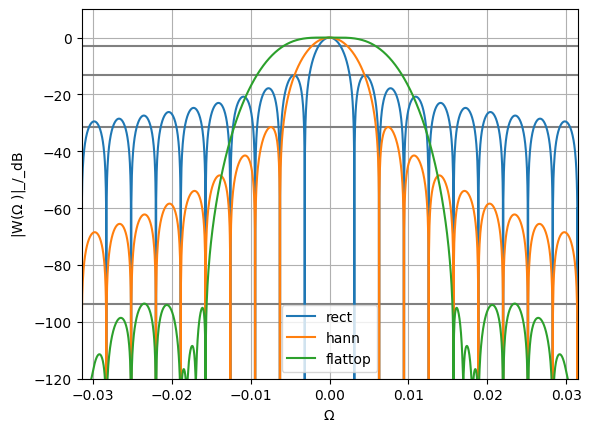

In [12]:
def winDTFTdB(w):
    N = w.size #get window length
    Nz = 100*N #zeropadding lengt
    W = np.zeros(Nz) #allocate RAM
    W[0:N] = w #insert windo
    W = np.abs(fftshift( fft(W))) #fft , fftshift and magni tude
    W /= np .max(W) #normalize to maximum, i.e. the mainlobe
    #maximum here
    W = 20*np . log10 (W) #getlevel in dB
    #get appropriate digital frequencies
    Omega = 2*np.pi/Nz*np.arange(Nz) - np.pi # also shifted
    return Omega, W

plt.plot([-np.pi, +np.pi], [-3.01, -3.01], 'gray') #mainlobe bandwidth
plt.plot([-np.pi, +np.pi], [-13.3, -13.3], 'gray') #rect max sidelobe
plt.plot([-np.pi, +np.pi], [-31.5, -31.5], 'gray') #hann max sidelobe
plt.plot([-np.pi, +np.pi], [-93.6, -93.6], 'gray') #flattop max

Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label='rect')
Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label='hann')
Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label='flattop')
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlim(-np.pi/100, np.pi/100) #zoom in to mainlob

plt.xlabel(r'$\Omega$')
plt.ylabel(r'|W($\Omega$ )|_/_dB')
plt.legend()
plt.grid(True)